# Aprendizaje no supervisado

In [1]:
import pandas as pd

# Cargar los datos proporcionados por el usuario
overall_path = '../../data/overall_limpio.csv'
jugadores_path = '../../data/jugadores_limpio.csv'

# Leer los archivos CSV
overall_df = pd.read_csv(overall_path)
jugadores_df = pd.read_csv(jugadores_path)

# Mostrar las primeras filas de cada dataframe para entender su estructura
(overall_df.head(), jugadores_df.head())

(      Season  Rk            Squad    MP    W    D    L    GF    GA    GD  \
 0  2022-2023   W  Manchester City  13.0  8.0  5.0  0.0  32.0   5.0  27.0   
 1  2022-2023   F            Inter  13.0  7.0  3.0  3.0  19.0  11.0   8.0   
 2  2022-2023  SF      Real Madrid  12.0  8.0  2.0  2.0  26.0  13.0  13.0   
 3  2022-2023  SF            Milan  12.0  5.0  3.0  4.0  15.0  11.0   4.0   
 4  2022-2023  QF    Bayern Munich  10.0  8.0  1.0  1.0  22.0   6.0  16.0   
 
     Pts  Attendance                      Top Team Scorer        Goalkeeper  \
 0  29.0     63639.0                       Erling Haaland           Ederson   
 1  24.0     71415.0                           Edin Džeko       André Onana   
 2  26.0     58761.0                      Vinicius Júnior  Thibaut Courtois   
 3  18.0     72546.0                       Olivier Giroud      Mike Maignan   
 4  25.0     75000.0  Leroy Sané,Eric Maxim Choupo-Moting       Yann Sommer   
 
    Top Team Scorer Goals  Country  
 0                   12

c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


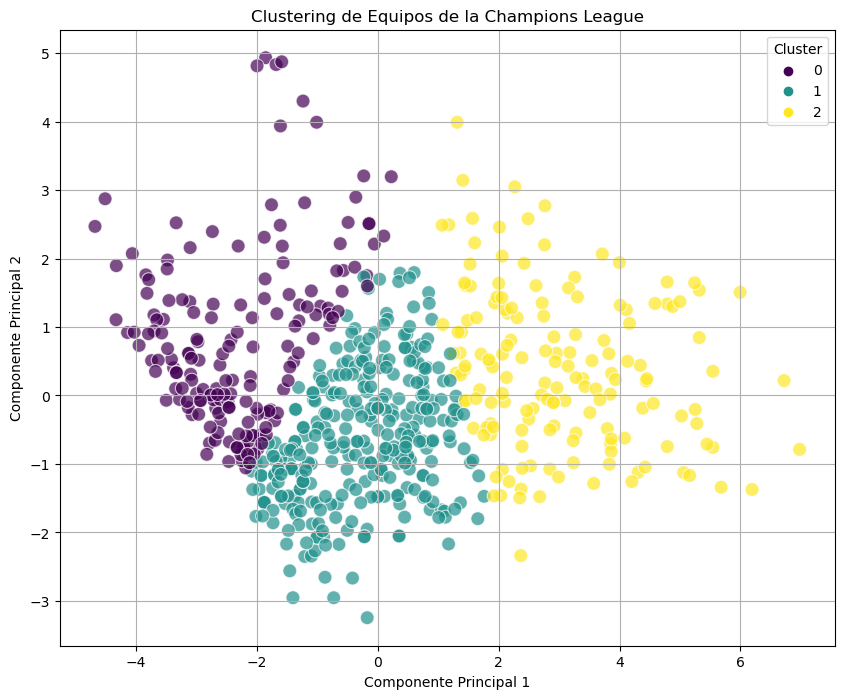

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas relevantes para el clustering
columns_to_cluster = ['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']

# Extraer las columnas relevantes
data_to_cluster = overall_df[columns_to_cluster]

# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_cluster)

# Aplicar KMeans para agrupar los equipos en 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_normalized)

# Añadir la asignación de clusters al dataframe original para análisis posterior
overall_df['Cluster'] = kmeans.labels_

# Visualizar los clusters utilizando PCA para reducir la dimensionalidad a 2D y facilitar la visualización
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_normalized)

# Añadir los componentes principales al dataframe para la visualización
overall_df['Principal Component 1'] = principalComponents[:,0]
overall_df['Principal Component 2'] = principalComponents[:,1]

# Gráfica de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=overall_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clustering de Equipos de la Champions League')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [3]:
# Crear un resumen de los equipos por cluster
clusters_summary = overall_df.groupby('Cluster')['Squad'].apply(list).reset_index()

# Calcular estadísticas descriptivas por cluster para entender las diferencias entre ellos
clusters_stats = overall_df.groupby('Cluster')[columns_to_cluster].mean().reset_index()

# Mostrar el resumen de equipos por cluster y las estadísticas descriptivas
clusters_summary, clusters_stats


(   Cluster                                              Squad
 0        0  [Eint Frankfurt, Ajax, Sevilla, Dinamo Zagreb,...
 1        1  [Chelsea, Liverpool, Paris S-G, Porto, RB Leip...
 2        2  [Manchester City, Inter, Real Madrid, Milan, B...,
    Cluster         MP         W         D         L         GF         GA  \
 0        0   7.229412  1.347059  1.364706  4.517647   7.123529  14.947059   
 1        1   7.878594  3.015974  2.169329  2.693291  10.661342   9.907348   
 2        2  11.662420  6.509554  2.923567  2.305732  22.273885  11.121019   
 
           GD        Pts  
 0  -7.823529   5.405882  
 1   0.753994  11.217252  
 2  11.152866  22.452229  )


Basándonos en la información proporcionada, hemos identificado tres clusters distintos de equipos que participaron en la Champions League, cada uno con características únicas según su rendimiento. 

### Cluster 0

* **Características Generales:** Este cluster agrupa a equipos con el menor rendimiento en general, con un promedio de partidos jugados, victorias, y puntos significativamente más bajos que los otros grupos. Además, estos equipos tienen una diferencia de goles negativa notable, indicando que han recibido más goles de los que han anotado.

* **Equipos Ejemplo:** Eint Frankfurt, Ajax, Dinamo Zagreb, Juventus, entre otros. Estos equipos han tenido un desempeño menos favorable en la competición.

### Cluster 1

* **Características Generales:** Representa a los equipos con el mejor desempeño. Tienen el mayor número de partidos jugados, victorias, y puntos. Además, la diferencia de goles es positivamente alta, lo que indica un fuerte desempeño ofensivo y defensivo.

* **Equipos Ejemplo:** Manchester City, Inter, Real Madrid, Milan, Bayern Munich, entre otros. Estos son los equipos más exitosos en el dataset, mostrando un fuerte desempeño que los coloca como potenciales favoritos para ganar el torneo.

### Cluster 2

* **Características Generales:** Este grupo está en un punto intermedio entre los otros dos clusters. Mientras que tienen un mejor rendimiento que los equipos del Cluster 0, no alcanzan los altos estándares del Cluster 1. La diferencia de goles es marginalmente positiva, indicando un equilibrio más ajustado entre goles a favor y en contra.

* **Equipos Ejemplo:** Chelsea, Liverpool, Paris S-G, Porto, RB Leipzig, entre otros. Aunque estos equipos han mostrado capacidades competitivas, sus estadísticas indican que tienen áreas de mejora para alcanzar el nivel más alto de desempeño en la competición.

explicar que hacer aqui

c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\albab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

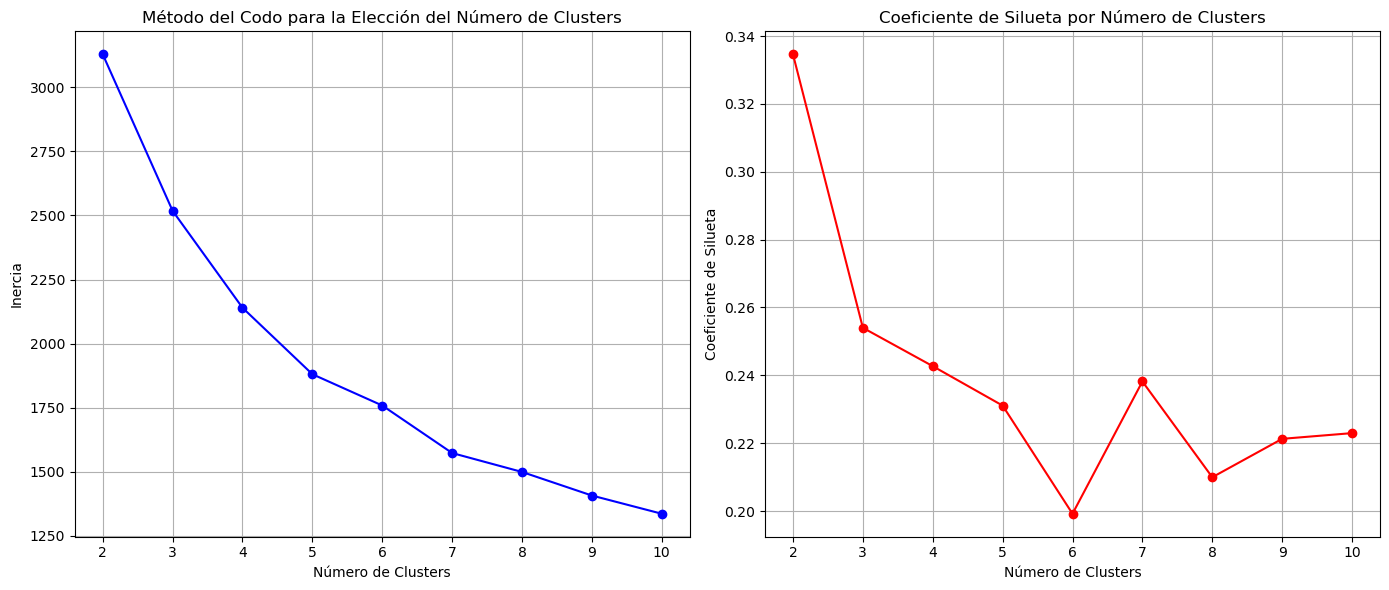

In [4]:
from sklearn.metrics import silhouette_score
import numpy as np

# Determinar el rango de números de clusters a evaluar
range_n_clusters = range(2, 11)

# Listas para almacenar los resultados de la suma de cuadrados dentro del cluster (inertia) y el coeficiente de silueta
inertias = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)
    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Gráfica del Método del Codo
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o', color='b')
plt.title('Método del Codo para la Elección del Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)

# Gráfica del Coeficiente de Silueta
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='r')
plt.title('Coeficiente de Silueta por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)

plt.tight_layout()
plt.show()


Las gráficas muestran dos métricas clave para determinar el número óptimo de clusters:

* **Método del Codo:** Observamos cómo disminuye la inercia (suma de las distancias cuadradas dentro de los clusters) a medida que aumenta el número de clusters. Buscamos un punto donde este descenso se estabiliza, indicando un balance entre el número de clusters y la cohesión dentro de ellos. En este caso, parece haber un punto de inflexión alrededor de 4 a 5 clusters, donde el descenso en inercia comienza a disminuir más lentamente.

* **Coeficiente de Silueta:** Muestra la calidad de los clusters, donde valores más altos indican que los clusters están bien definidos y separados entre sí. Los valores fluctúan a medida que cambiamos el número de clusters, con picos que sugieren buenos agrupamientos. Los picos notables en este análisis sugieren que alrededor de 2 a 4 clusters podrían proporcionar agrupamientos razonablemente buenos, con el valor más alto alrededor de 2 clusters.

Ambas métricas proporcionan una guía para elegir el número de clusters, pero también depende del contexto y el propósito del análisis. Para nuestro caso, donde queremos una división clara que pueda reflejar diferencias significativas en el rendimiento de los equipos, un número de clusters entre 3 y 5 podría ser apropiado, basándonos en el equilibrio entre la inercia y la calidad de los clusters indicada por el coeficiente de silueta.

Por lo tanto, el número qur elegimos de clusters (3) es correcto

c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

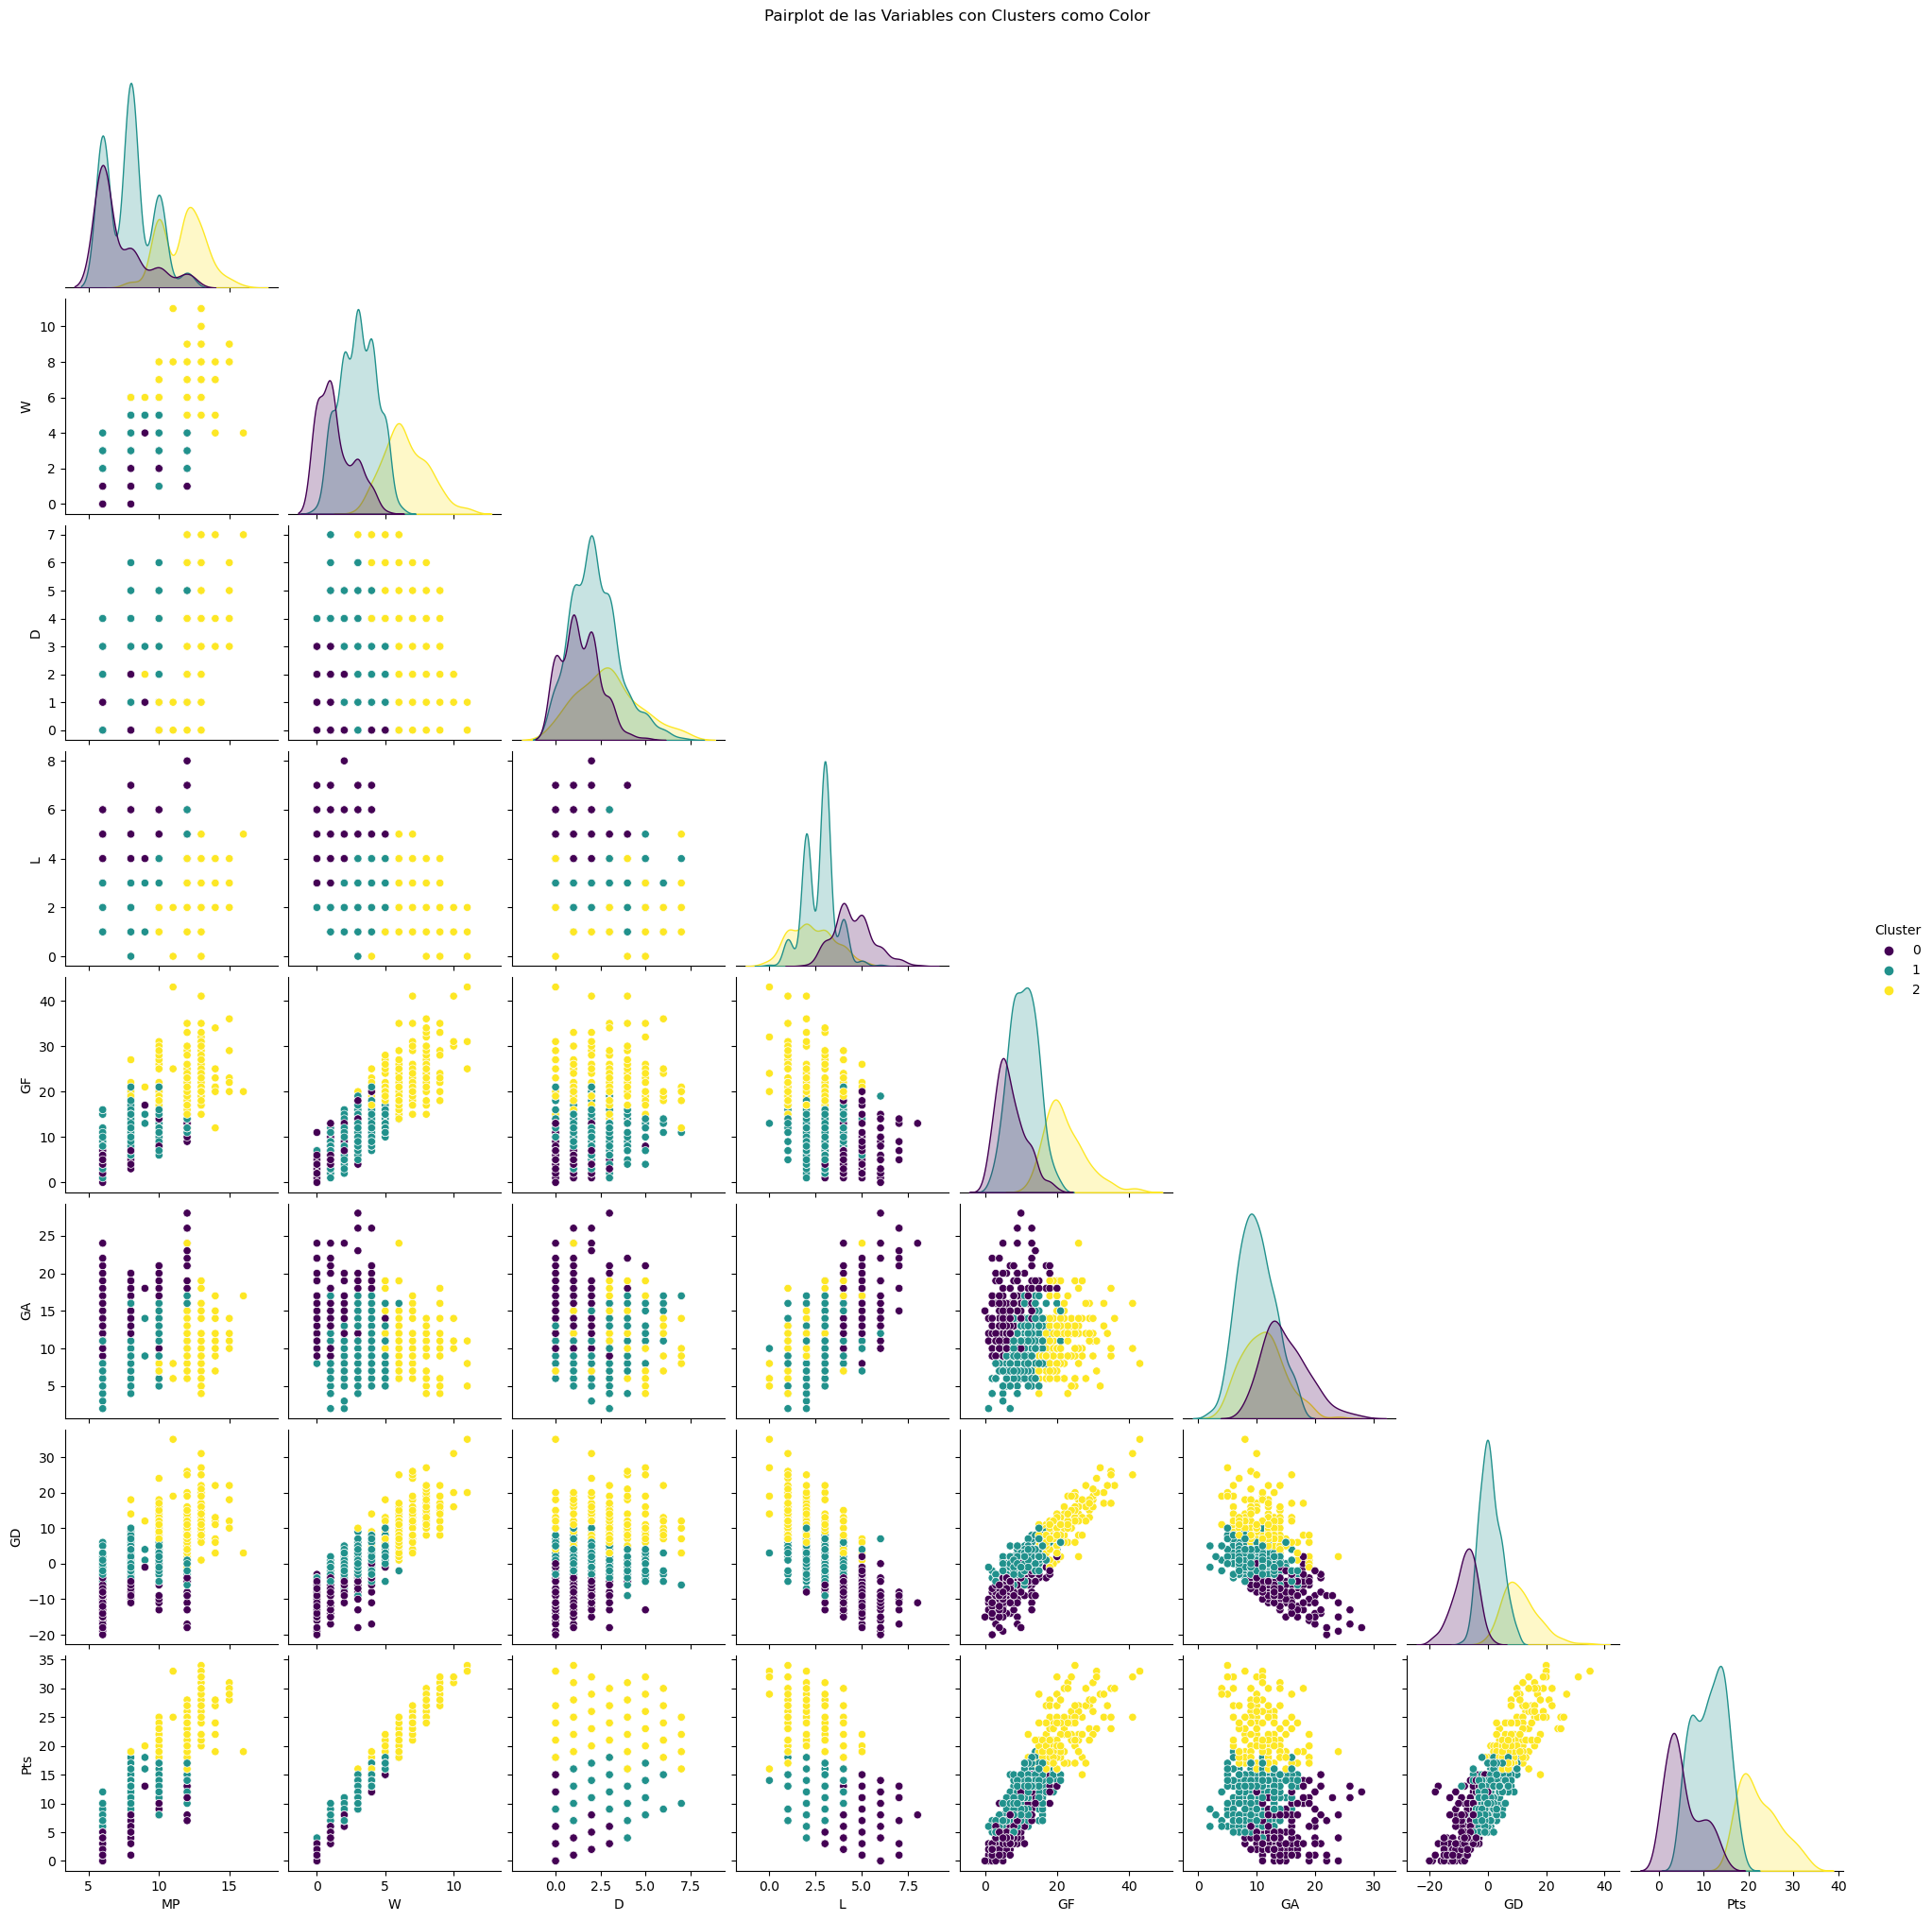

In [5]:
# Para corregir el problema, vamos a verificar y tratar los valores NaN en las columnas seleccionadas para el clustering.
# Luego, intentaremos generar el pairplot nuevamente.

# Verificar si hay valores NaN en las columnas seleccionadas
nan_check = overall_df[columns_to_cluster].isna().sum()

# Si hay valores NaN, los reemplazaremos con la media de cada columna para simplificar
# Esta es una aproximación común, aunque la elección de tratamiento de NaNs debe considerar el contexto de los datos
if nan_check.sum() > 0:
    overall_df.fillna(overall_df.mean(), inplace=True)

# Intentar generar el pairplot nuevamente
sns.pairplot(overall_df[columns_to_cluster + ['Cluster']], hue='Cluster', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle('Pairplot de las Variables con Clusters como Color', y=1.02)
plt.show()


c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

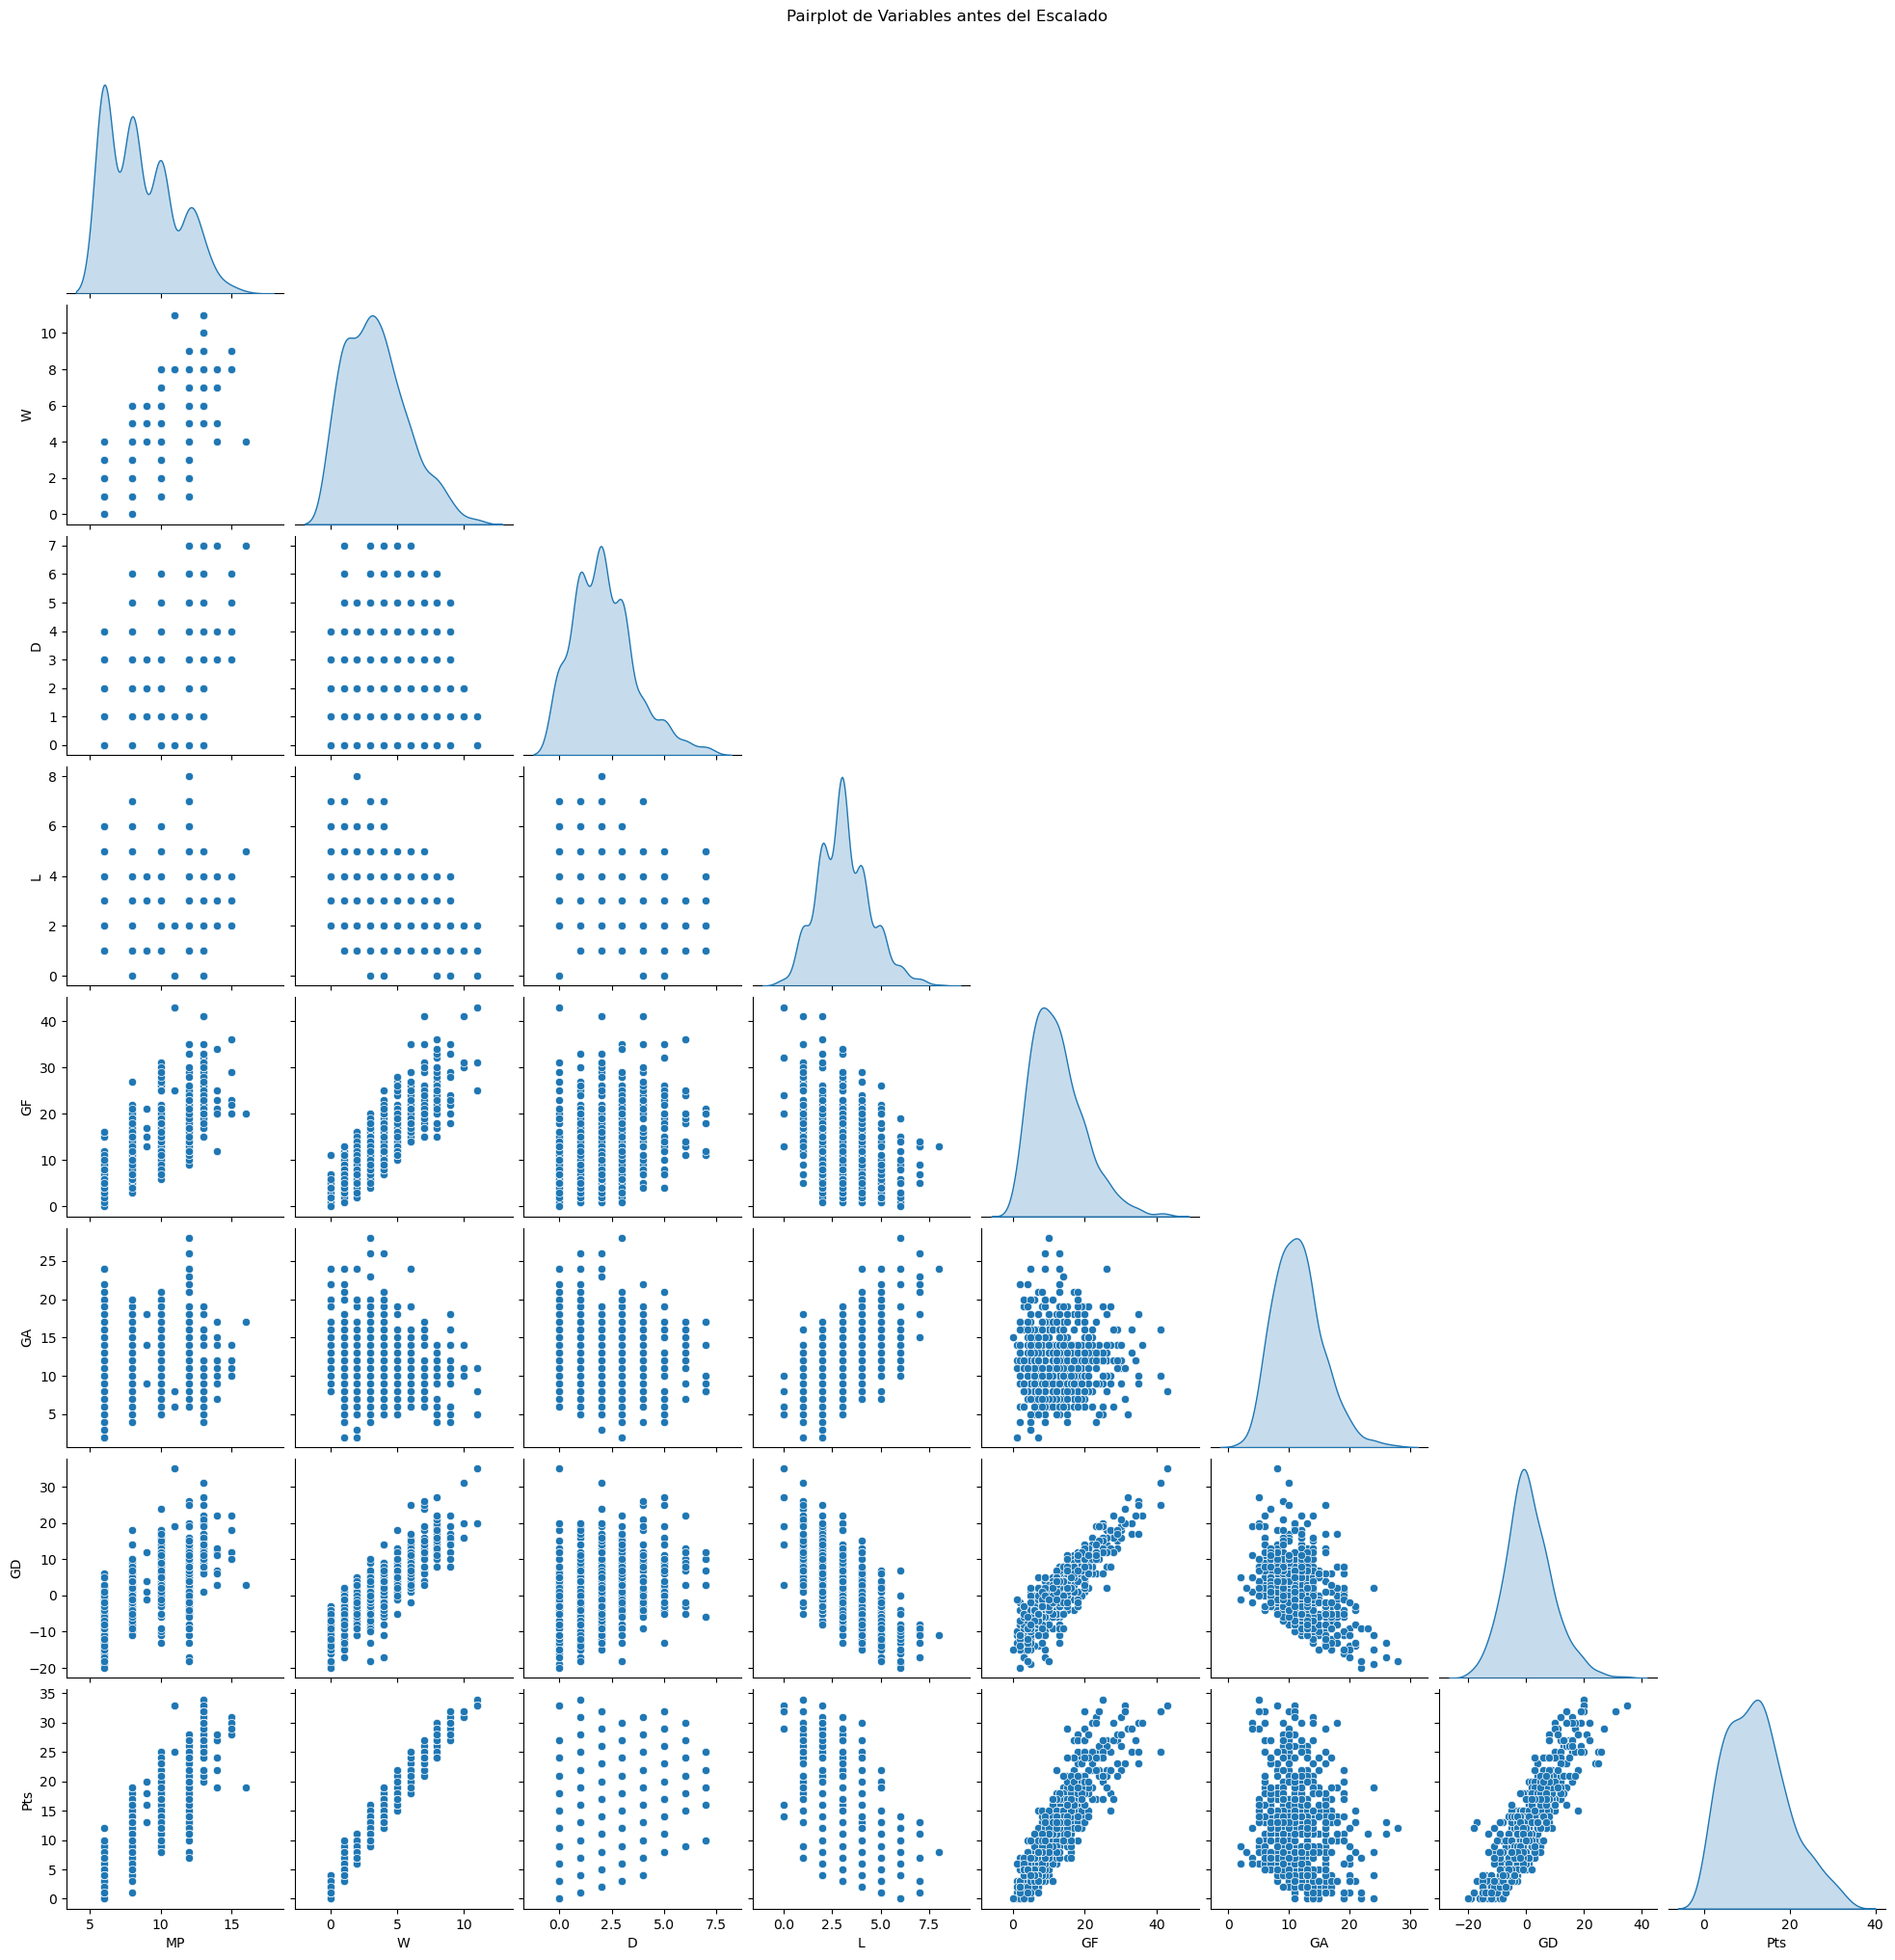

c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

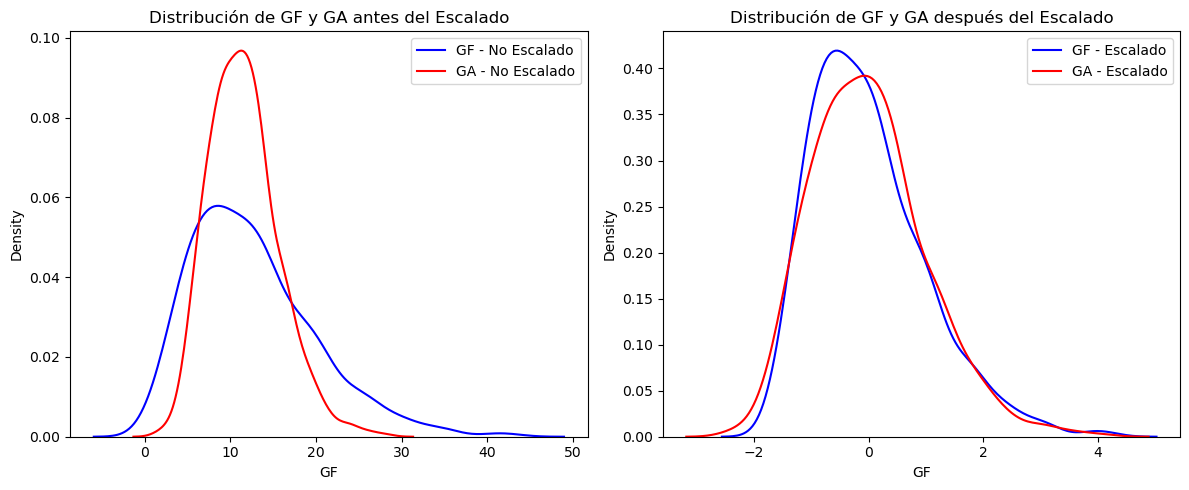

In [6]:
# Antes de reintentar el pairplot, verificamos y preprocesamos los datos para asegurarnos de que sean adecuados
# Eliminamos filas con valores NaN en las columnas seleccionadas para el clustering
cleaned_df = overall_df[columns_to_cluster].dropna()

# Ahora intentamos generar el pairplot nuevamente
sns.pairplot(cleaned_df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot de Variables antes del Escalado', y=1.02)
plt.show()

# Para visualizar los efectos del escalado, comparamos las distribuciones antes y después del escalado.
# Seleccionamos una muestra de columnas para simplificar la visualización
sample_columns = ['GF', 'GA']  # Ejemplo con Goles a Favor y Goles en Contra

# Visualización de los datos antes del escalado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(data=cleaned_df, x='GF', ax=axs[0], color='blue', label='GF - No Escalado')
sns.kdeplot(data=cleaned_df, x='GA', ax=axs[0], color='red', label='GA - No Escalado')
axs[0].set_title('Distribución de GF y GA antes del Escalado')
axs[0].legend()

# Visualización de los datos después del escalado
scaled_df = pd.DataFrame(data_normalized, columns=columns_to_cluster)
sns.kdeplot(data=scaled_df, x='GF', ax=axs[1], color='blue', label='GF - Escalado')
sns.kdeplot(data=scaled_df, x='GA', ax=axs[1], color='red', label='GA - Escalado')
axs[1].set_title('Distribución de GF y GA después del Escalado')
axs[1].legend()

plt.tight_layout()
plt.show()


c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\albab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

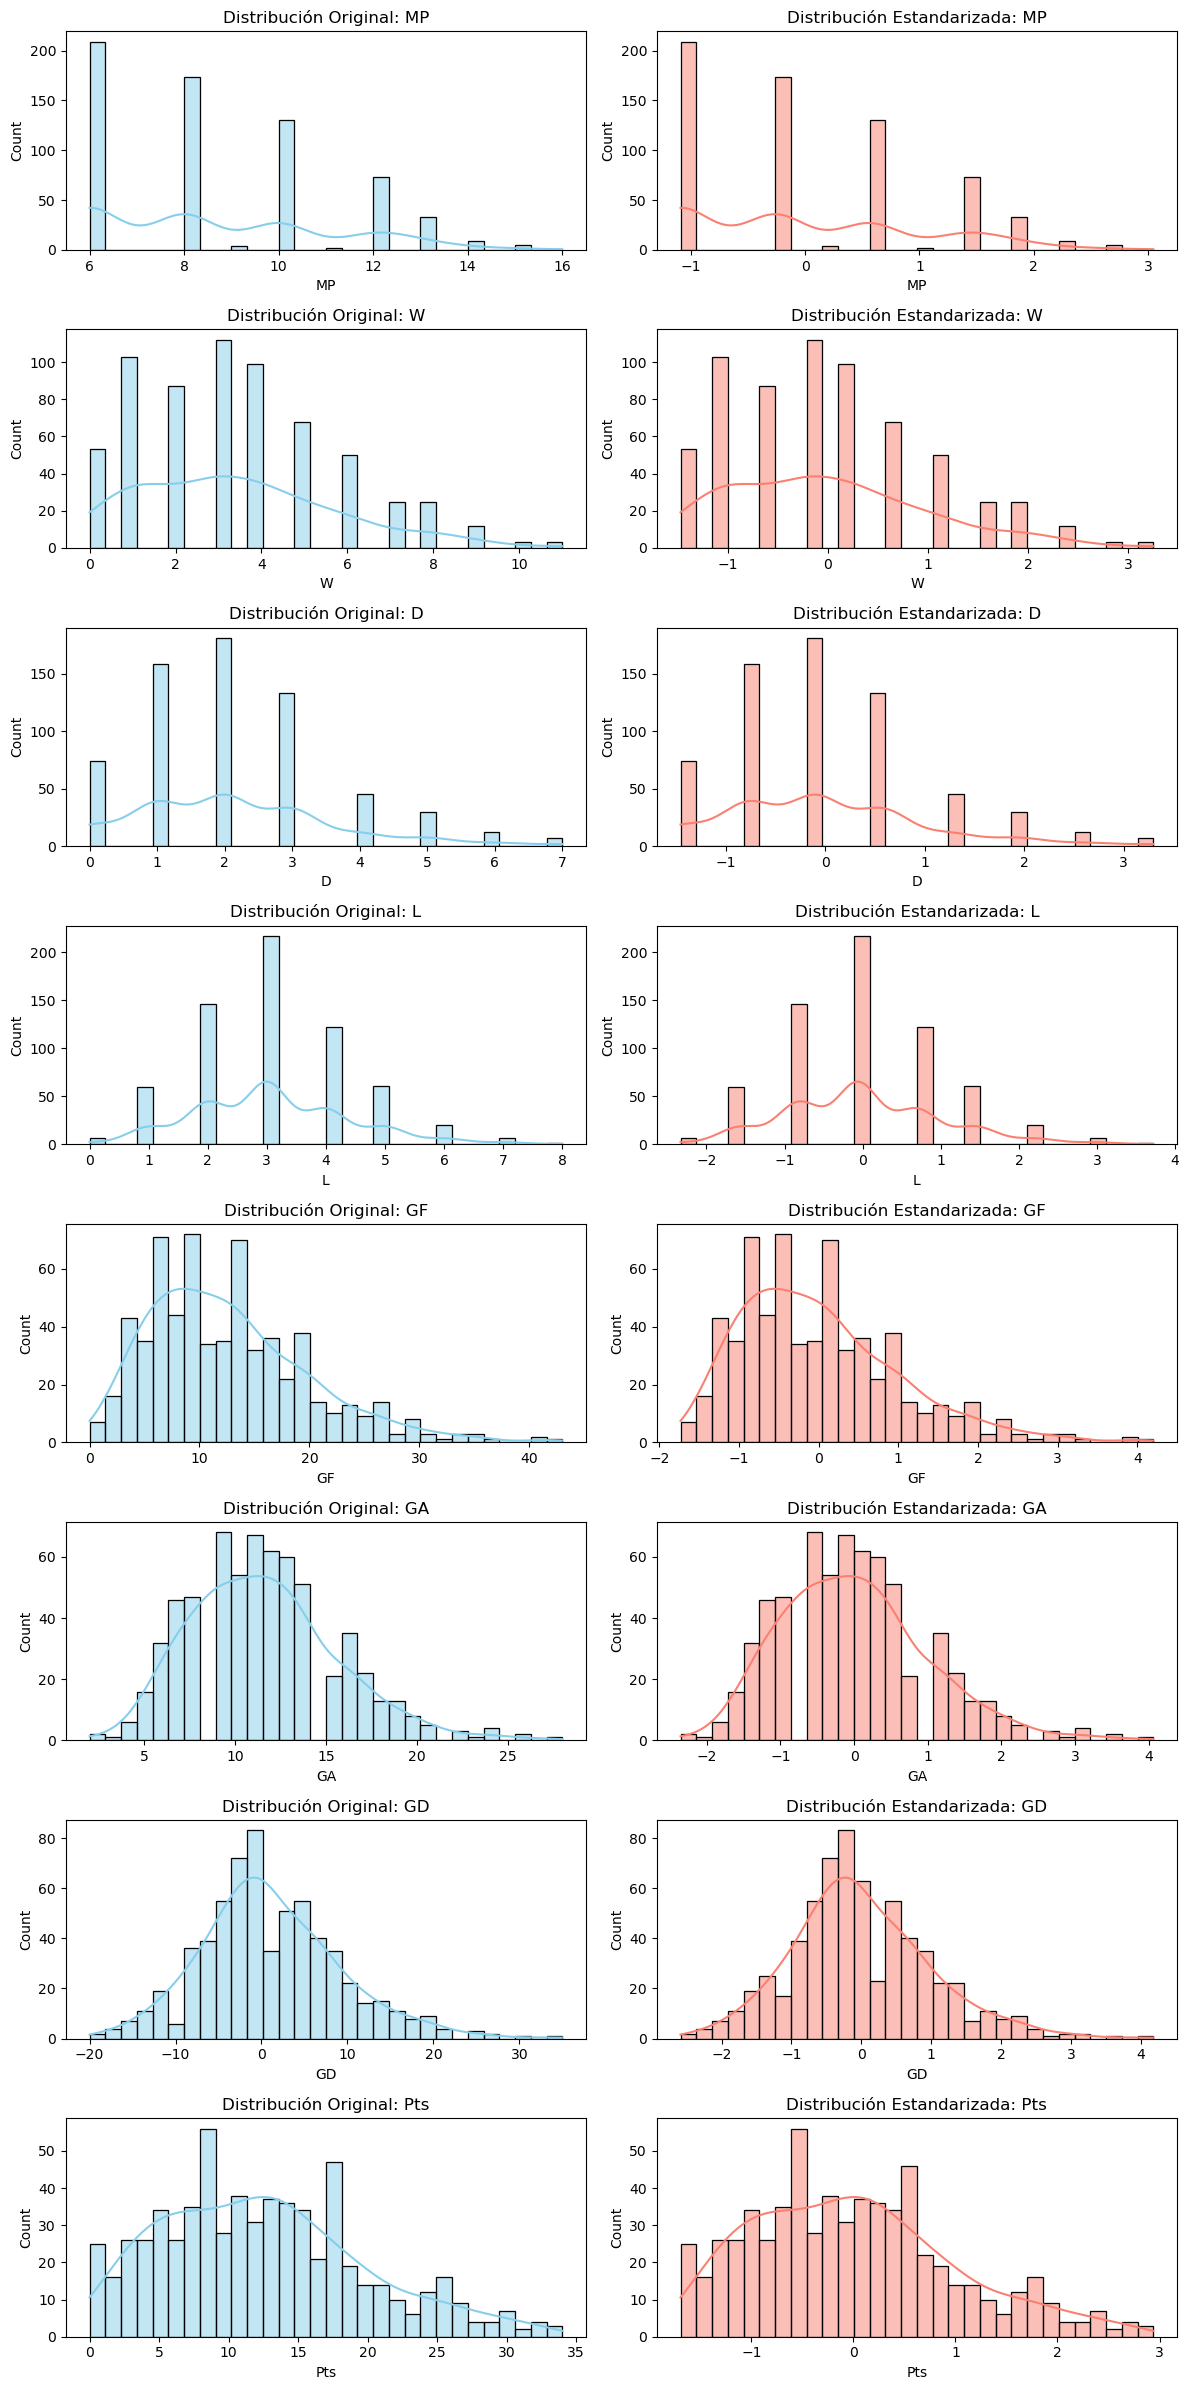

In [7]:


# Para graficar la distribución de los valores originales y estandarizados, seleccionaremos todas las columnas
# que se utilizaron para el clustering. Luego, se crearán gráficos para cada columna comparando sus valores
# originales con los estandarizados.

# Crearemos una figura con subplots para visualizar las distribuciones
num_columns = len(columns_to_cluster)
fig, axs = plt.subplots(num_columns, 2, figsize=(12, num_columns * 3))

for i, col in enumerate(columns_to_cluster):
    # Graficar la distribución de los valores originales
    sns.histplot(cleaned_df[col], kde=True, ax=axs[i, 0], color='skyblue', bins=30)
    axs[i, 0].set_title(f'Distribución Original: {col}')
    
    # Graficar la distribución de los valores estandarizados
    sns.histplot(scaled_df[col], kde=True, ax=axs[i, 1], color='salmon', bins=30)
    axs[i, 1].set_title(f'Distribución Estandarizada: {col}')
    
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


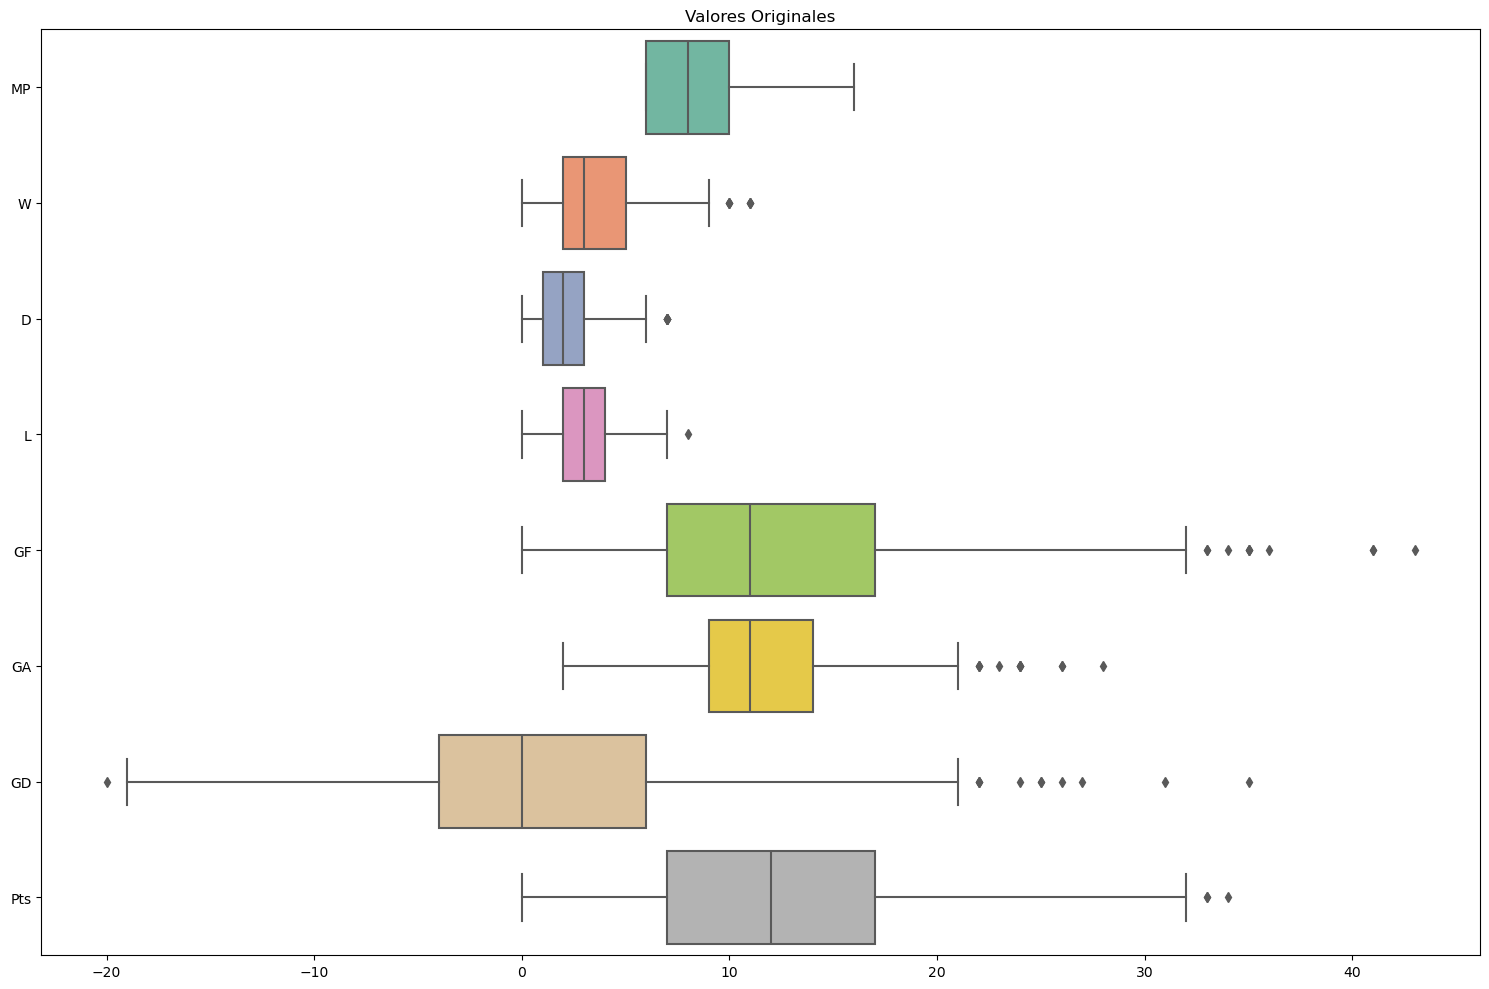

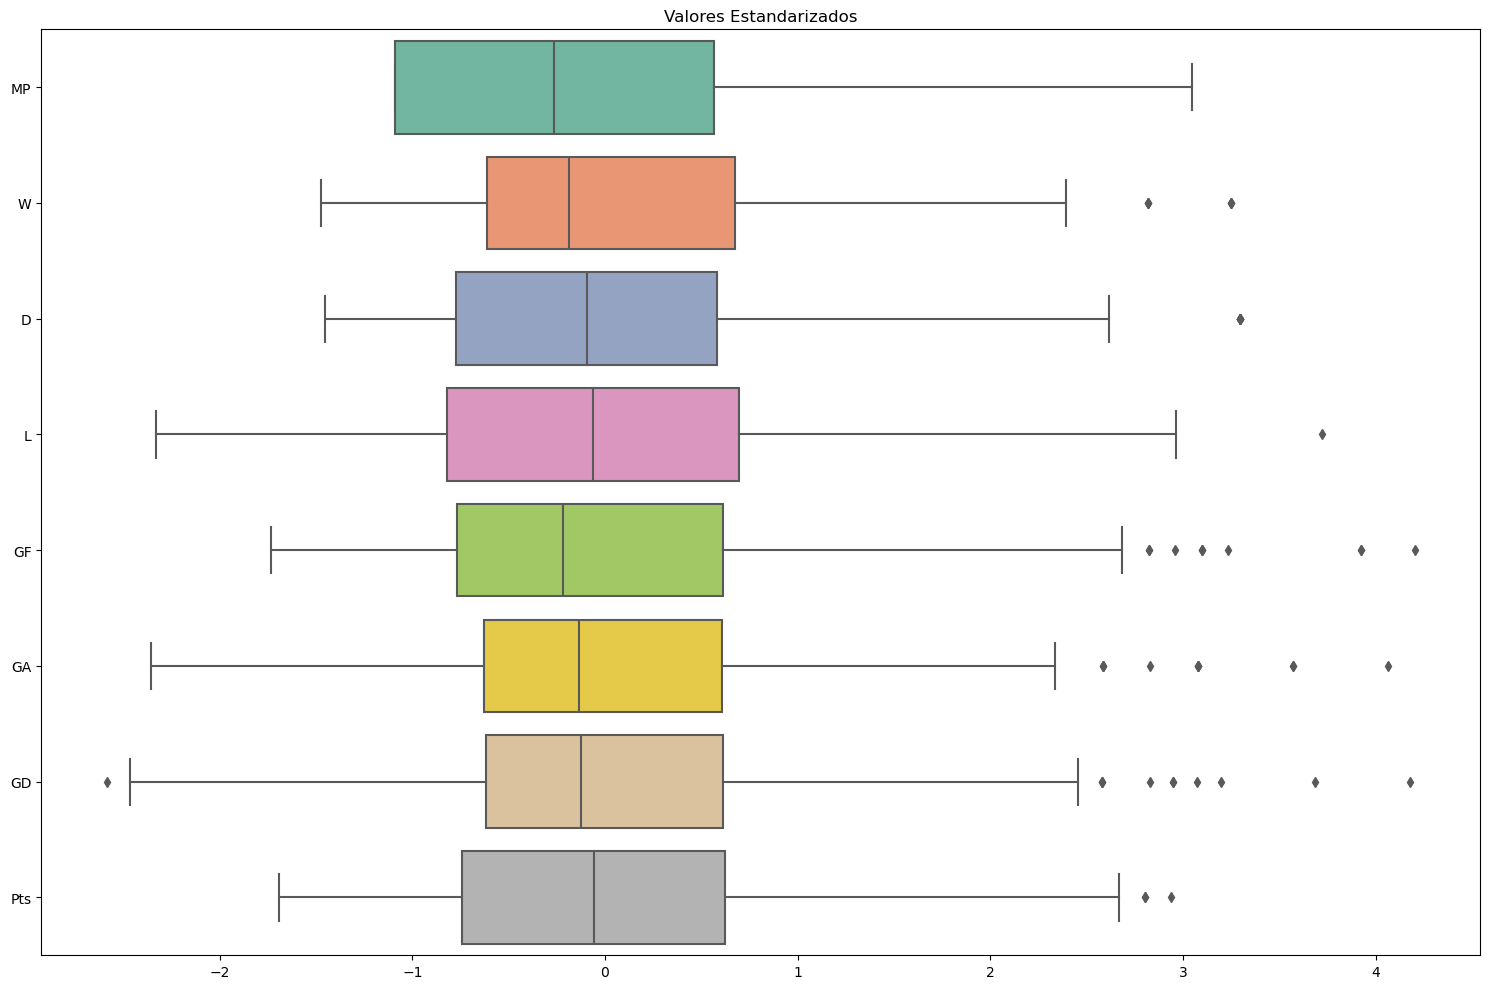

In [9]:
# Corregir el enfoque para generar los diagramas de caja de manera que se eviten errores previos
# Separar en dos figuras para simplificar la visualización y asegurar que el proceso funcione correctamente

# Diagramas de caja para los valores originales
plt.figure(figsize=(15, 10))
sns.boxplot(data=overall_df[columns_to_cluster], orient="h", palette="Set2")
plt.title('Valores Originales')
plt.tight_layout()
plt.show()

# Diagramas de caja para los valores estandarizados
plt.figure(figsize=(15, 10))
sns.boxplot(data=pd.DataFrame(data_normalized, columns=columns_to_cluster), orient="h", palette="Set2")
plt.title('Valores Estandarizados')
plt.tight_layout()
plt.show()
